Movie reviews dataset to classify reviews as 'positive' or 'negative'.

In [1]:
import pandas as pd
import numpy as np

In [3]:
# reading the training data and testing data .
training=pd.read_csv("movie_review_train.csv")
testing = pd.read_csv("movie_review_test.csv")

In [4]:
training.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [5]:
testing.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [7]:
training['class'] = training['class'].map({"Pos":1,"Neg":0})

In [10]:
training.head(2)

,class,text
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...


In [11]:
training.tail(2)

,class,text
1598,0,there was a time when john carpenter was a gr...
1599,0,two party guys bob their heads to haddaway s ...


In [14]:
x_array = training.values

In [15]:
x_train = x_array[:,1]
y_train = x_array[:,0]
y_train = y_train.astype(int)

In [17]:
print(y_train)

[1 1 1 ... 0 0 0]


In [18]:
print(x_train)

[' a common complaint amongst film critics is   why aren t there more literate scripts available      quiz show gives signs of hope that the art of writing isn t dead in hollywood and that we need not only look to independent films for thoughtful content    paul attanasio s script takes what could have been a tepid thriller   the quiz show scandals of the late 50s   and delivers a telling parable about the emptiness of the post war american dream and the golden bubble that surrounds and protects tv networks and their sponsors    the film is riddled with telling symbols   e   g    a  58 chrysler   a radio announcement of sputnik   but is never heavy handed    deft direction by robert redford and keen performances by ralph fiennes   john turturro and rob morrow dovetail perfectly with the carefully honed script    redford departs from the usually overlight     cable tv quality   sets and camera work so common in recent 20th century period pieces    quiz show perfectly captures the colors

In [29]:
training["class"].value_counts()

class
1    800
0    800
Name: count, dtype: int64

In [46]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer

dict = CountVectorizer(stop_words='english')

In [47]:
#Fitting the Vecotorizer on training Dataset. 
dict.fit(x_train)

CountVectorizer(stop_words='english')

In [48]:
dict.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [41]:
x_train_vocab_dicts = dict.get_feature_names_out()
len(x_train_vocab_dicts)


['00' '000' '007' ... 'zus' 'zwick' 'zwigoff']
35858


What is the size of vocabulary after removing the stop words? Note that the vocabulary size depends only on the training set.

Answer as above. 35858

In [51]:
len(dict.vocabulary_.keys())

35858

In [54]:
#Using New Dictionary / Vocabulary based on given conditions. 
'''
Suppose we don't want to consider those (rare) words which have appeared only in 3% of the documents, or say those (extremely common ones) which have appeared in 80% of the documents.

Use CountVectorizer(stop_words='english', min_df=.03, max_df=.8) to create a new vocabulary from the training set. What is the size of the new vocabulary?
'''
updated_dict=CountVectorizer(stop_words='english',min_df=.03,max_df=0.8)
updated_dict.fit(x_train)
updated_dict.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [55]:
x_train_vocab_dicts_updated = updated_dict.get_feature_names_out()
len(x_train_vocab_dicts_updated)

1643

In [56]:
len(updated_dict.vocabulary_.keys())

1643

In [57]:
x_train_transformed=updated_dict.transform(x_train)
x_train_transformed

<1600x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 217396 stored elements in Compressed Sparse Row format>

In [58]:
#converting transformed matrix to an array
x_train=x_train_transformed.toarray()

In [60]:
pd.DataFrame(x_train_transformed.toarray(),columns=updated_dict.get_feature_names_out()).head()

,000,10,100,13,15,1995,1996,1997,1998,1999,...,written,wrong,wrote,yeah,year,years,yes,york,young,younger
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
testing['class'] = testing['class'].map({"Pos":1,"Neg":0})

In [62]:
testing.head()

,class,text
0,1,films adapted from comic books have had plent...
1,1,every now and then a movie comes along from a...
2,1,you ve got mail works alot better than it des...
3,1,jaws is a rare film that grabs your atte...
4,1,moviemaking is a lot like being the general m...


In [63]:
testing_array = testing.values

x_test=testing_array[:,1]
y_test=testing_array[:,0]
y_test=y_test.astype('int')

In [64]:
x_test_transformed=updated_dict.transform(x_test)
x_test_transformed

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

Suppose we build the vocabulary from the training data using CountVectorizer(stop_words='english', min_df=.03, max_df=.8) and then transform the test data using CountVectorizer(). How many nonzero entries are there in the sparse matrix (corresponding to the test data)? 
Answer - 51663

In [65]:
x_test=x_test_transformed.toarray()

In [66]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 2, 0]])

In [69]:
# note that the type is transformed (sparse) matrix
print(type(x_test_transformed))
print(x_test_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 11)	1
  (0, 18)	2
  (0, 23)	1
  (0, 29)	1
  (0, 31)	1
  (0, 53)	1
  (0, 73)	1
  (0, 94)	1
  (0, 110)	1
  (0, 118)	1
  (0, 133)	1
  (0, 134)	1
  (0, 140)	1
  (0, 141)	1
  (0, 151)	3
  (0, 152)	1
  (0, 173)	1
  (0, 176)	1
  (0, 177)	1
  (0, 188)	2
  (0, 189)	1
  (0, 195)	1
  (0, 197)	1
  (0, 203)	1
  (0, 206)	1
  :	:
  (399, 1314)	2
  (399, 1325)	1
  (399, 1354)	1
  (399, 1371)	1
  (399, 1375)	2
  (399, 1382)	1
  (399, 1399)	2
  (399, 1411)	1
  (399, 1416)	1
  (399, 1418)	1
  (399, 1430)	1
  (399, 1463)	2
  (399, 1471)	1
  (399, 1475)	1
  (399, 1514)	2
  (399, 1516)	1
  (399, 1542)	1
  (399, 1546)	2
  (399, 1549)	1
  (399, 1609)	3
  (399, 1632)	1
  (399, 1633)	3
  (399, 1637)	1
  (399, 1638)	1
  (399, 1641)	2


In [67]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
# instantiate NB class
mnb=MultinomialNB()

Let us summarise all we have done till now:

- dict_updated.fit(train) learns the vocabulary of the training data
- dict_updated.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
- dict_updated.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

In [71]:
# fitting the model on training data
mnb.fit(x_train_transformed, y_train)

MultinomialNB()

In [72]:
# note that we are using the sparse matrix X_transformed, 
# though you can also use the non-sparse version
# mnb.fit(X_transformed.toarray(), y_train) 

# predicting probabilities of test data
proba = mnb.predict_proba(x_test_transformed)

In [75]:
# predict class
y_pred_class = mnb.predict(x_test_transformed)

In [76]:
mnb

MultinomialNB()

In [77]:
y_pred_class

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [78]:
proba

array([[4.72220911e-01, 5.27779089e-01],
       [1.46791072e-02, 9.85320893e-01],
       [8.06229525e-03, 9.91937705e-01],
       [3.82892252e-14, 1.00000000e+00],
       [9.99994569e-01, 5.43053306e-06],
       [2.06482974e-19, 1.00000000e+00],
       [1.84756956e-10, 1.00000000e+00],
       [4.41160693e-05, 9.99955884e-01],
       [6.34701076e-04, 9.99365299e-01],
       [2.15099949e-03, 9.97849001e-01],
       [1.67387911e-04, 9.99832612e-01],
       [1.53916508e-03, 9.98460835e-01],
       [9.42580804e-06, 9.99990574e-01],
       [3.94569247e-06, 9.99996054e-01],
       [1.30379599e-02, 9.86962040e-01],
       [4.95955521e-03, 9.95040445e-01],
       [4.87700524e-01, 5.12299476e-01],
       [4.84740721e-11, 1.00000000e+00],
       [1.45854901e-01, 8.54145099e-01],
       [9.79724905e-01, 2.02750951e-02],
       [1.52084321e-01, 8.47915679e-01],
       [1.09017591e-03, 9.98909824e-01],
       [9.99997220e-01, 2.78000287e-06],
       [8.18449930e-09, 9.99999992e-01],
       [2.546754

In [79]:
from sklearn import metrics


In [82]:
metrics.accuracy_score(y_test,y_pred_class)

0.8275

In [83]:
confusion=metrics.confusion_matrix(y_test,y_pred_class)
confusion

array([[172,  28],
       [ 41, 159]])

In [84]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [85]:
sensitivity=TP/float(TP+FN)
sensitivity

0.795

In [86]:
specificity=TN/float(TN+FP)
specificity

0.86

In [87]:
from sklearn.naive_bayes import BernoulliNB

In [88]:
bnb=BernoulliNB()

In [91]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [92]:
y_pre=bnb.predict(x_test)

In [93]:
ps=bnb.predict_proba(x_test)

In [94]:
metrics.accuracy_score(y_test,y_pre)

0.79

In [95]:
confuse=metrics.confusion_matrix(y_test,y_pre)
confuse

array([[177,  23],
       [ 61, 139]])

Run metrics.confusion_matrix(actual class of test data, predicted class of test data). How many reviews are actually negative but have been classified as positive by the model?

In [96]:
TN=confuse[0,0]
FP=confuse[0,1]
FN=confuse[1,0]
TP=confuse[1,1]

In [97]:
sensitivity=TP/float(TP+FN)
sensitivity

0.695

In [98]:
specificity=TN/float(TN+FP)
specificity

0.885

In [100]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,proba[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

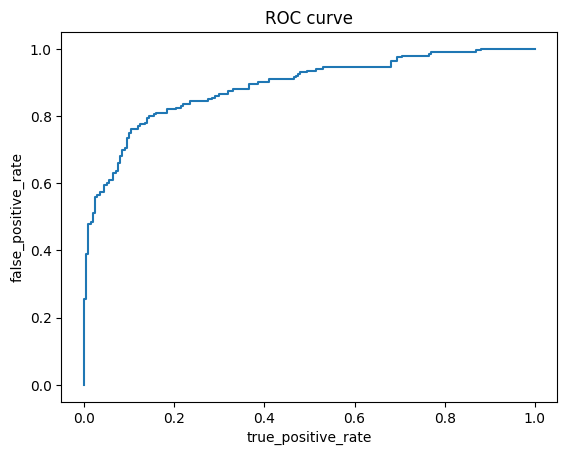

In [101]:
%matplotlib inline
plt.xlabel('true_positive_rate')
plt.ylabel('false_positive_rate')
plt.title('ROC curve')
plt.plot(false_positive_rate,true_positive_rate)

In [102]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,ps[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

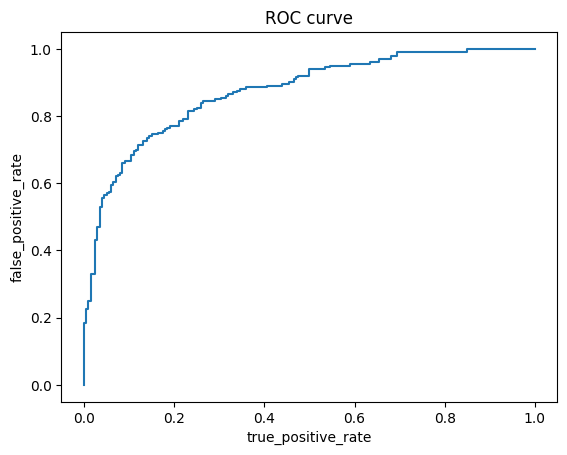

In [103]:
%matplotlib inline
plt.xlabel('true_positive_rate')
plt.ylabel('false_positive_rate')
plt.title('ROC curve')
plt.plot(false_positive_rate,true_positive_rate)
plt.show()